# Predicting Price of Houses.

## 1. Problem Definition



## 2. Data

There are twomain datasets.
* Train Set - to train the model
* Test Set - to test the model

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error)

## 4. Features

The features in the given dataset are given in `data_description.txt` file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
#Import trainign set
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
df = pd.read_csv("Data/train.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Find the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [7]:
# Turn all of the string value into category value
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [9]:
df.ExterQual.cat.codes

0       2
1       3
2       2
3       3
4       2
       ..
1455    3
1456    3
1457    0
1458    3
1459    2
Length: 1460, dtype: int8

In [10]:
# Check missing data

df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [11]:
# Check numureic columns
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [12]:
# Check for which numeric column has null values

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [13]:
# Fill Numeric null value with MEDIAN
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df[label+"_is_Missing"] = pd.isnull(content)
            # Fill missing numeric value with median
            df[label] = content.fillna(content.median())

In [14]:
# Check again for which numeric column has null values

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [15]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column which tells us if the data was missing
        df[label+"_is_Missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [16]:
pd.Categorical(df["ExterQual"]).codes

array([2, 3, 2, ..., 0, 3, 2], dtype=int8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_Missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


In [18]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
PoolQC_is_Missing,True,True,True,True,True
Fence_is_Missing,True,True,True,True,True
MiscFeature_is_Missing,True,True,True,True,True
SaleType_is_Missing,False,False,False,False,False


In [19]:
df.sort_values(by=["YearBuilt"], inplace=True, ascending=True)

In [20]:
df.YearBuilt

1349    1872
1137    1875
747     1880
304     1880
1132    1880
        ... 
898     2009
515     2009
157     2009
762     2009
378     2010
Name: YearBuilt, Length: 1460, dtype: int64

### Now as all the data is numeric and has no missing value, we can do the modelling.

In [21]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df.drop("SalePrice", axis=1), df["SalePrice"])

Wall time: 1.62 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [22]:
# Score the model
model.score(df.drop("SalePrice", axis=1), df["SalePrice"])

0.9791484076136823

### Splitting data into train/validation sets

In [23]:
# Splitting data
df_val = df[df.YearBuilt <2005]
df_train = df[df.YearBuilt >= 2005]

len(df_val), len(df_train)

(1238, 222)

In [24]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((222, 126), (222,), (1238, 126), (1238,))

### Building am evaluation function

In [158]:
# Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between 
    predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different model

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds),
              "Valid RMSE": rmse(y_valid, val_preds)}
    return scores

In [26]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model.fit(X_train, y_train)

Wall time: 192 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
show_scores(model)

{'Training MAE': 9865.194594594594,
 'Valid MAE': 46165.109168012925,
 'Training RMSLE': 0.0657314016985176,
 'Valid RMSLE': 0.35051513003079765,
 'Training R^2': 0.9667004329352393,
 'Valid R^2': 0.28791685775937004,
 'Valid RMSE': 0.350517779069835}

### Hyperparameter tuning with RandomizedSearchCV

In [28]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5,1, "sqrt", "auto"]}

#Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=100,
                             cv=5,
                             verbose=True)

#Fit the RandomizedSearchCV
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 38 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [29]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 5}

In [30]:
show_scores(rs_model)

{'Training MAE': 15956.059173423591,
 'Valid MAE': 48433.06102615865,
 'Training RMSLE': 0.09424268747363246,
 'Valid RMSLE': 0.36857156034611077,
 'Training R^2': 0.9269066174922351,
 'Valid R^2': 0.25402456970975695,
 'Valid RMSE': 0.3685743490611925}

In [31]:
df.OverallQual

1349     8
1137     5
747      7
304      7
1132     6
        ..
898      9
515     10
157      8
762      7
378      9
Name: OverallQual, Length: 1460, dtype: int64

In [32]:
# Let's make our correaltion matrix
corr_matrix = df.corr('pearson')

In [33]:
pd.crosstab(df.OverallQual, df.SalePrice)

SalePrice,34900,35311,37900,39300,40000,52000,52500,55000,55993,58500,...,485000,501837,538000,555000,556581,582933,611657,625000,745000,755000
OverallQual,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0


In [34]:
df.SalePrice.value_counts()

140000    20
135000    17
155000    14
145000    14
110000    13
          ..
263000     1
337000     1
156500     1
306000     1
206000     1
Name: SalePrice, Length: 663, dtype: int64

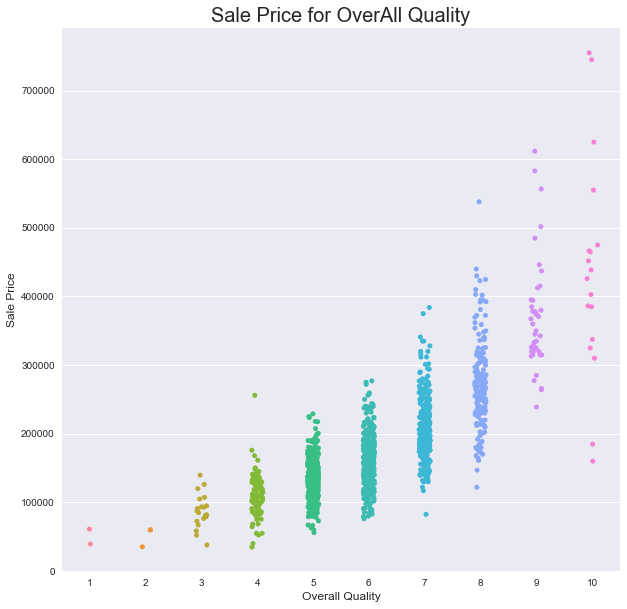

In [41]:
figure, ax = plt.subplots(figsize = (10,10))
sns.stripplot(data=df, x = 'OverallQual', y='SalePrice')
# sns.violinplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[1])
# sns.boxplot(data=data_w, x = 'OverallQual', y='SalePrice', ax = ax[2])
# Add some communication
plt.style.use("seaborn-pastel")
plt.title("Sale Price for OverAll Quality", fontsize=20)
plt.xlabel("Overall Quality", fontsize=12)
plt.ylabel("Sale Price", fontsize=12)
plt.xticks(rotation=0);
plt.show()

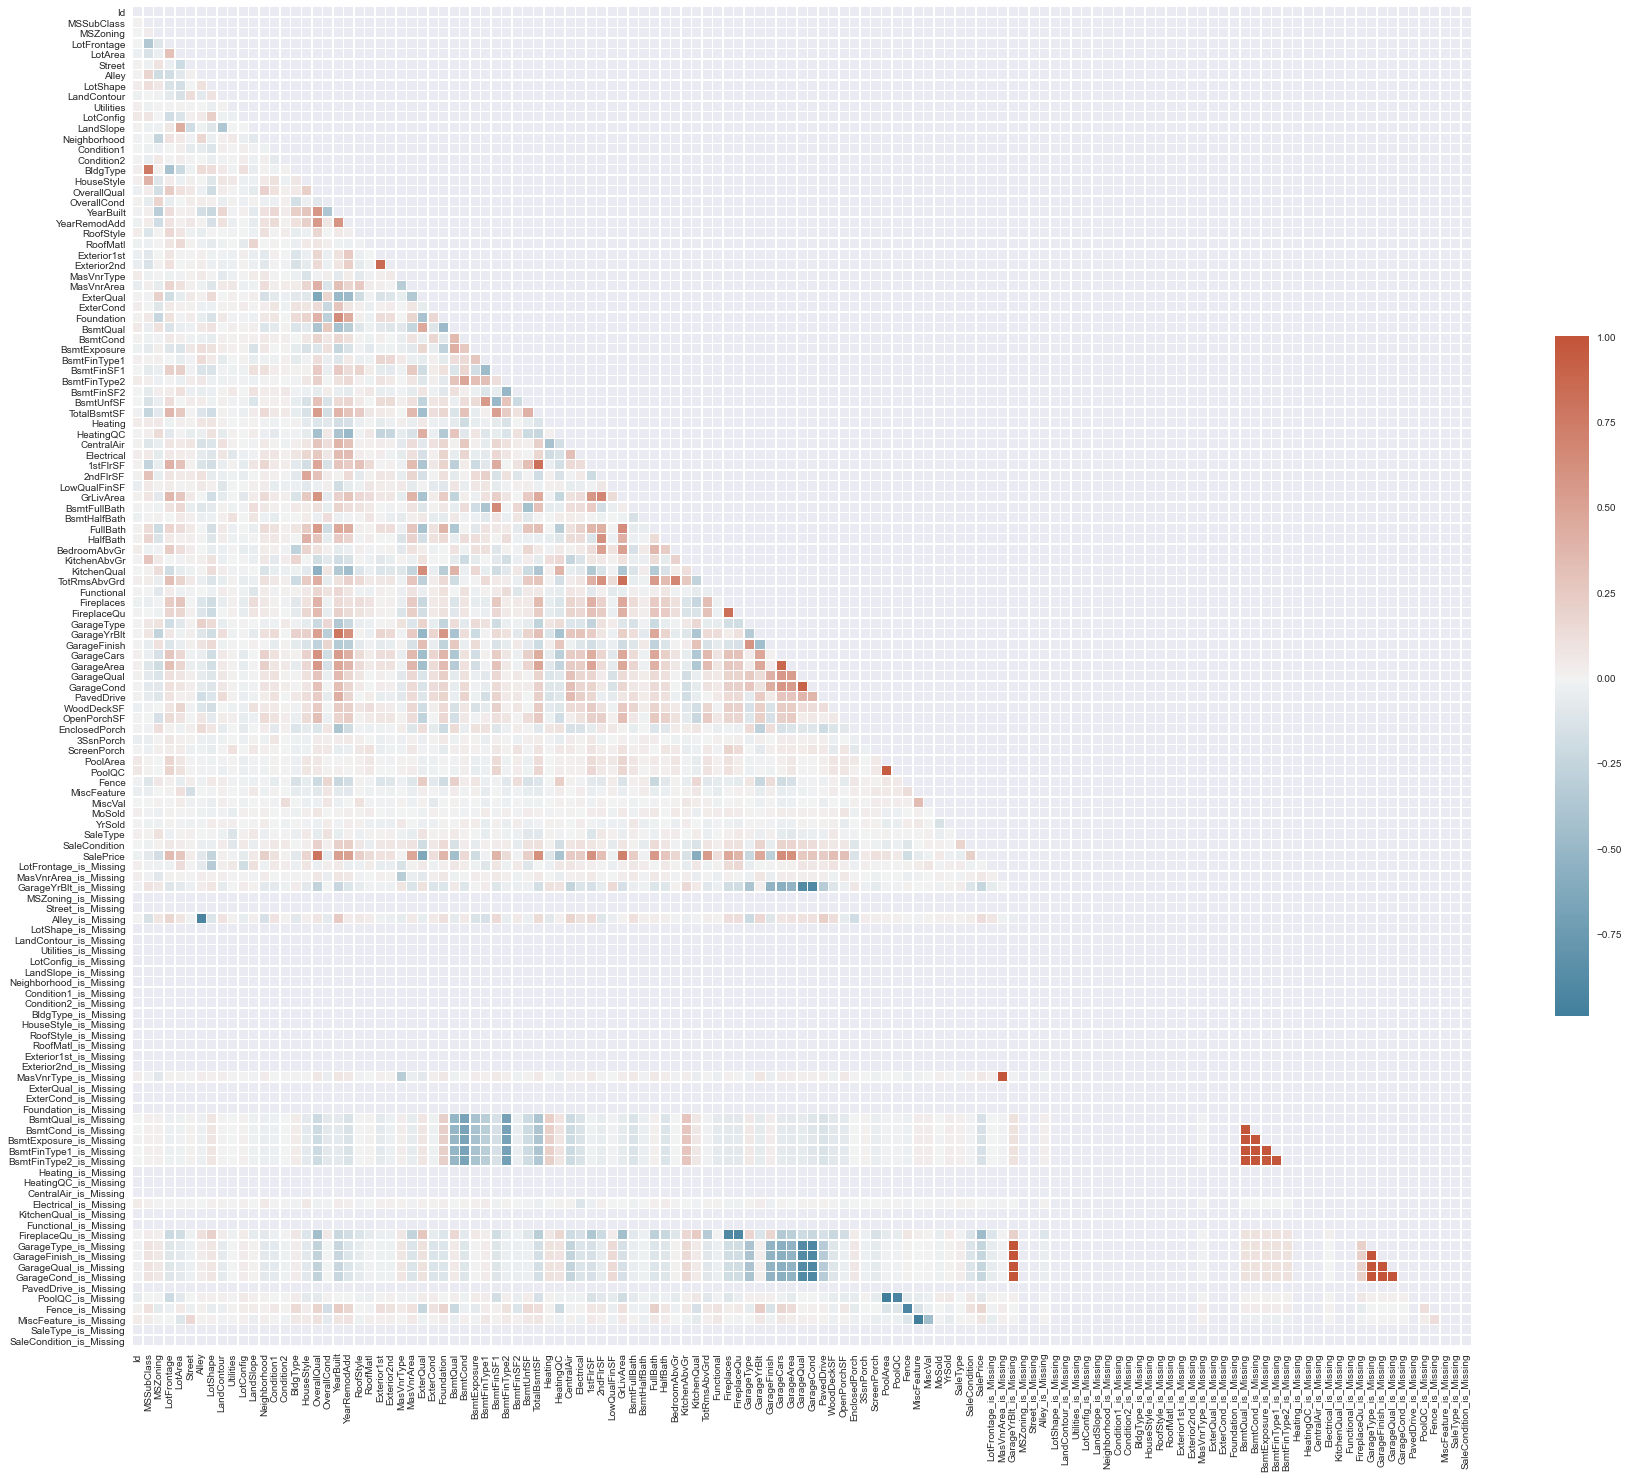

In [42]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, annot = False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [37]:
# Let's make our correaltion matrix
corr_mat = df.corr('pearson')['SalePrice'][:]

In [38]:
corr_mat

Id                         -0.021917
MSSubClass                 -0.084284
MSZoning                   -0.166872
LotFrontage                 0.334771
LotArea                     0.263843
                              ...   
PoolQC_is_Missing          -0.093708
Fence_is_Missing            0.172184
MiscFeature_is_Missing      0.072298
SaleType_is_Missing              NaN
SaleCondition_is_Missing         NaN
Name: SalePrice, Length: 127, dtype: float64

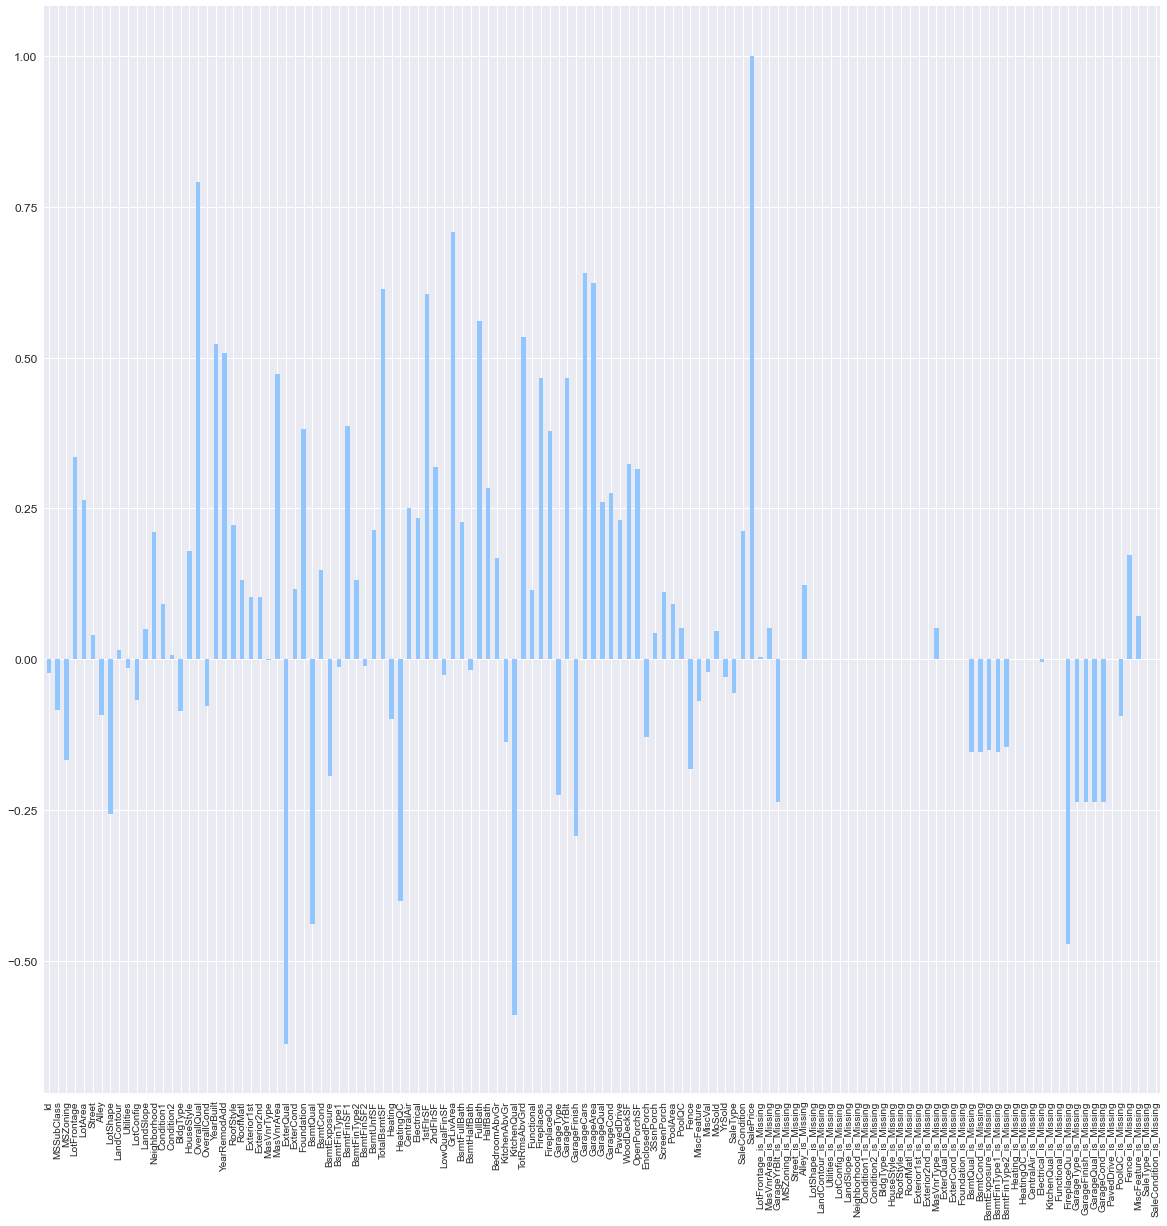

In [43]:
fig, ax = plt.subplots(figsize=(20,20))
corr_mat.plot.bar()
plt.xticks(fontsize=10)
plt.yticks(fontsize=12);

In [44]:
corr_mat

Id                         -0.021917
MSSubClass                 -0.084284
MSZoning                   -0.166872
LotFrontage                 0.334771
LotArea                     0.263843
                              ...   
PoolQC_is_Missing          -0.093708
Fence_is_Missing            0.172184
MiscFeature_is_Missing      0.072298
SaleType_is_Missing              NaN
SaleCondition_is_Missing         NaN
Name: SalePrice, Length: 127, dtype: float64

### We are going to drop all the features thas has less than 0.3 correlation value to the saleprice to see how it will change the model score.

In [91]:
dropped_index = []
for i in range(0,127):
    if abs(corr_mat[i]) < 0.3:
        dropped_index.append(i)
        print(i)
dropped_index

0
1
2
4
5
6
7
8
9
10
11
12
13
14
15
16
18
21
22
23
24
25
28
31
32
33
35
36
37
39
41
42
45
47
48
50
51
52
55
58
60
63
64
65
68
69
70
71
72
73
74
75
76
77
78
79
81
82
83
86
101
105
106
107
108
109
113
117
118
119
120
122
123
124


[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 21,
 22,
 23,
 24,
 25,
 28,
 31,
 32,
 33,
 35,
 36,
 37,
 39,
 41,
 42,
 45,
 47,
 48,
 50,
 51,
 52,
 55,
 58,
 60,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 86,
 101,
 105,
 106,
 107,
 108,
 109,
 113,
 117,
 118,
 119,
 120,
 122,
 123,
 124]

In [92]:
df_tmp = df.drop(df.columns[dropped_index], axis = 1)

In [93]:
df_tmp

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,...,Foundation_is_Missing,Heating_is_Missing,HeatingQC_is_Missing,CentralAir_is_Missing,KitchenQual_is_Missing,Functional_is_Missing,FireplaceQu_is_Missing,PavedDrive_is_Missing,SaleType_is_Missing,SaleCondition_is_Missing
1349,50.0,8,1872,1987,0.0,4,1,4,259,684,...,False,False,False,False,False,False,True,False,False,False
1137,54.0,5,1875,1996,0.0,4,2,4,0,780,...,False,False,False,False,False,False,True,False,False,False
747,65.0,7,1880,2003,0.0,3,5,4,0,1240,...,False,False,False,False,False,False,False,False,False,False
304,87.0,7,1880,2002,0.0,4,1,4,0,1470,...,False,False,False,False,False,False,False,False,False,False
1132,90.0,6,1880,1950,0.0,4,1,4,0,1008,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,100.0,9,2009,2010,760.0,1,3,1,2188,2330,...,False,False,False,False,False,False,False,False,False,False
515,94.0,10,2009,2009,305.0,1,2,1,1436,2006,...,False,False,False,False,False,False,False,False,False,False
157,92.0,8,2009,2010,84.0,3,3,1,0,774,...,False,False,False,False,False,False,False,False,False,False
762,72.0,7,2009,2009,0.0,4,3,3,24,756,...,False,False,False,False,False,False,True,False,False,False


Now that the features with low correlation has been dropped out we can fit new data into the model to see if the outcome is better or not.

In [94]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Wall time: 393 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [95]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9785454718858663

In [96]:
# Splitting data
df_val = df_tmp[df_tmp.YearBuilt <2005]
df_train = df_tmp[df_tmp.YearBuilt >= 2005]

len(df_val), len(df_train)

(1238, 222)

In [97]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((222, 52), (222,), (1238, 52), (1238,))

In [98]:
%%time
model_tmp = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model_tmp.fit(X_train, y_train)

Wall time: 169 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [69]:
show_scores(model_tmp)

{'Training MAE': 9924.63337837838,
 'Valid MAE': 41166.00665589661,
 'Training RMSLE': 0.06869173728979133,
 'Valid RMSLE': 0.3232558681979428,
 'Training R^2': 0.9632090892806306,
 'Valid R^2': 0.36986829256539633,
 'Valid RMSE': 0.3232583321596209}

In [99]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_valid,y_valid),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [100]:
show_scores(cat_model)

{'Training MAE': 4975.076036678694,
 'Valid MAE': 34219.753558196986,
 'Training RMSLE': 0.029195885767243933,
 'Valid RMSLE': 0.2916504650796224,
 'Training R^2': 0.9950406417955753,
 'Valid R^2': 0.5378771456698747,
 'Valid RMSE': 0.29165283593531993}

### Now that we see, new catboost regressor is working better and gives us better result in terms of RMSE, we are going to add more featues from the original data and may use hyperparamter tuning.

In [107]:
%%time
from sklearn.model_selection import GridSearchCV
# Preforming a Random Grid Search to find the best combination of parameters

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
Grid_CBC = GridSearchCV(estimator=final_model, param_grid = grid, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

0:	learn: 91222.1846825	total: 1.24ms	remaining: 7.46s
1:	learn: 91011.2750526	total: 2.94ms	remaining: 8.83s
2:	learn: 90811.8648015	total: 4.04ms	remaining: 8.07s
3:	learn: 90639.2045583	total: 5.13ms	remaining: 7.69s
4:	learn: 90452.8205210	total: 6.44ms	remaining: 7.72s
5:	learn: 90283.9877614	total: 7.61ms	remaining: 7.6s
6:	learn: 90079.9265974	total: 9.36ms	remaining: 8.01s
7:	learn: 89860.1161762	total: 10.5ms	remaining: 7.83s
8:	learn: 89666.9933930	total: 11.4ms	remaining: 7.58s
9:	learn: 89492.9555672	total: 12.3ms	remaining: 7.4s
10:	learn: 89280.3375754	total: 13.3ms	remaining: 7.25s
11:	learn: 89055.5750867	total: 14.3ms	remaining: 7.12s
12:	learn: 88867.6770069	total: 15.3ms	remaining: 7.06s
13:	learn: 88667.2759413	total: 16.8ms	remaining: 7.17s
14:	learn: 88498.9227253	total: 18.1ms	remaining: 7.22s
15:	learn: 88294.7231716	total: 19.4ms	remaining: 7.26s
16:	learn: 88130.2886503	total: 20.7ms	remaining: 7.3s
17:	learn: 87923.2652875	total: 22ms	remaining: 7.32s
18:	lea

158:	learn: 67072.8449460	total: 152ms	remaining: 5.6s
159:	learn: 66987.7639606	total: 153ms	remaining: 5.6s
160:	learn: 66862.4042548	total: 155ms	remaining: 5.6s
161:	learn: 66761.5895496	total: 156ms	remaining: 5.61s
162:	learn: 66633.0046236	total: 157ms	remaining: 5.61s
163:	learn: 66523.4434991	total: 157ms	remaining: 5.6s
164:	learn: 66397.5402852	total: 158ms	remaining: 5.6s
165:	learn: 66285.6832109	total: 159ms	remaining: 5.6s
166:	learn: 66179.1245620	total: 160ms	remaining: 5.6s
167:	learn: 66075.4907201	total: 161ms	remaining: 5.6s
168:	learn: 65968.7200304	total: 162ms	remaining: 5.6s
169:	learn: 65847.4952573	total: 163ms	remaining: 5.6s
170:	learn: 65720.3691547	total: 165ms	remaining: 5.62s
171:	learn: 65619.0281460	total: 166ms	remaining: 5.62s
172:	learn: 65503.6848737	total: 167ms	remaining: 5.63s
173:	learn: 65407.0472367	total: 168ms	remaining: 5.63s
174:	learn: 65329.9096388	total: 169ms	remaining: 5.63s
175:	learn: 65224.7821581	total: 170ms	remaining: 5.62s
17

323:	learn: 53039.6101718	total: 311ms	remaining: 5.45s
324:	learn: 52967.7596463	total: 312ms	remaining: 5.45s
325:	learn: 52913.2727966	total: 313ms	remaining: 5.45s
326:	learn: 52856.0261506	total: 314ms	remaining: 5.45s
327:	learn: 52801.0877239	total: 315ms	remaining: 5.45s
328:	learn: 52728.2701056	total: 316ms	remaining: 5.44s
329:	learn: 52668.3401622	total: 317ms	remaining: 5.44s
330:	learn: 52594.5663626	total: 317ms	remaining: 5.43s
331:	learn: 52532.7824581	total: 318ms	remaining: 5.43s
332:	learn: 52453.5908864	total: 319ms	remaining: 5.42s
333:	learn: 52384.1102595	total: 320ms	remaining: 5.42s
334:	learn: 52329.7438954	total: 320ms	remaining: 5.42s
335:	learn: 52270.3027770	total: 321ms	remaining: 5.42s
336:	learn: 52198.3522289	total: 322ms	remaining: 5.42s
337:	learn: 52150.0356627	total: 323ms	remaining: 5.42s
338:	learn: 52061.3202678	total: 324ms	remaining: 5.41s
339:	learn: 52005.3812535	total: 325ms	remaining: 5.41s
340:	learn: 51957.6941145	total: 326ms	remaining

499:	learn: 44176.2625281	total: 473ms	remaining: 5.2s
500:	learn: 44134.9185085	total: 474ms	remaining: 5.2s
501:	learn: 44109.0550393	total: 475ms	remaining: 5.2s
502:	learn: 44081.4036100	total: 476ms	remaining: 5.2s
503:	learn: 44038.2409582	total: 477ms	remaining: 5.2s
504:	learn: 44007.5806291	total: 478ms	remaining: 5.2s
505:	learn: 43977.0407544	total: 479ms	remaining: 5.2s
506:	learn: 43951.9030832	total: 480ms	remaining: 5.2s
507:	learn: 43910.1928432	total: 481ms	remaining: 5.2s
508:	learn: 43861.8073288	total: 482ms	remaining: 5.2s
509:	learn: 43826.1779946	total: 483ms	remaining: 5.2s
510:	learn: 43795.7951384	total: 484ms	remaining: 5.2s
511:	learn: 43774.7342451	total: 486ms	remaining: 5.21s
512:	learn: 43736.7779757	total: 487ms	remaining: 5.21s
513:	learn: 43696.7898574	total: 488ms	remaining: 5.21s
514:	learn: 43662.2831056	total: 489ms	remaining: 5.21s
515:	learn: 43614.8037489	total: 490ms	remaining: 5.21s
516:	learn: 43566.8065291	total: 491ms	remaining: 5.21s
517:

654:	learn: 39248.6536926	total: 633ms	remaining: 5.17s
655:	learn: 39217.7222168	total: 634ms	remaining: 5.17s
656:	learn: 39190.5083569	total: 635ms	remaining: 5.16s
657:	learn: 39170.7426448	total: 636ms	remaining: 5.16s
658:	learn: 39136.8091018	total: 637ms	remaining: 5.17s
659:	learn: 39103.4093349	total: 638ms	remaining: 5.17s
660:	learn: 39077.4887039	total: 639ms	remaining: 5.16s
661:	learn: 39053.9243503	total: 640ms	remaining: 5.16s
662:	learn: 39026.1026000	total: 641ms	remaining: 5.16s
663:	learn: 39002.2312606	total: 642ms	remaining: 5.16s
664:	learn: 38980.6534572	total: 642ms	remaining: 5.15s
665:	learn: 38945.2018565	total: 643ms	remaining: 5.15s
666:	learn: 38921.2143134	total: 644ms	remaining: 5.15s
667:	learn: 38890.1002836	total: 645ms	remaining: 5.15s
668:	learn: 38872.2505507	total: 646ms	remaining: 5.15s
669:	learn: 38843.2455309	total: 647ms	remaining: 5.15s
670:	learn: 38824.0743976	total: 648ms	remaining: 5.14s
671:	learn: 38795.4525172	total: 649ms	remaining

850:	learn: 34963.3959494	total: 797ms	remaining: 4.82s
851:	learn: 34944.7803110	total: 798ms	remaining: 4.82s
852:	learn: 34928.9751890	total: 799ms	remaining: 4.82s
853:	learn: 34918.0094482	total: 800ms	remaining: 4.82s
854:	learn: 34901.6672383	total: 801ms	remaining: 4.82s
855:	learn: 34882.9390400	total: 802ms	remaining: 4.82s
856:	learn: 34859.5998617	total: 803ms	remaining: 4.82s
857:	learn: 34845.7940052	total: 804ms	remaining: 4.82s
858:	learn: 34822.5226394	total: 805ms	remaining: 4.82s
859:	learn: 34799.1252383	total: 805ms	remaining: 4.81s
860:	learn: 34785.0011571	total: 806ms	remaining: 4.81s
861:	learn: 34765.9835611	total: 807ms	remaining: 4.81s
862:	learn: 34748.9149083	total: 808ms	remaining: 4.81s
863:	learn: 34738.7717960	total: 809ms	remaining: 4.81s
864:	learn: 34714.9608613	total: 810ms	remaining: 4.81s
865:	learn: 34697.8786633	total: 811ms	remaining: 4.81s
866:	learn: 34675.3602150	total: 812ms	remaining: 4.81s
867:	learn: 34660.5926629	total: 813ms	remaining

1031:	learn: 32250.8381307	total: 956ms	remaining: 4.6s
1032:	learn: 32239.1555548	total: 957ms	remaining: 4.6s
1033:	learn: 32224.0119296	total: 958ms	remaining: 4.6s
1034:	learn: 32215.8220399	total: 959ms	remaining: 4.6s
1035:	learn: 32203.0602133	total: 960ms	remaining: 4.6s
1036:	learn: 32193.5587053	total: 961ms	remaining: 4.6s
1037:	learn: 32181.5668338	total: 961ms	remaining: 4.59s
1038:	learn: 32171.1759217	total: 962ms	remaining: 4.59s
1039:	learn: 32160.5246523	total: 963ms	remaining: 4.59s
1040:	learn: 32144.3610497	total: 964ms	remaining: 4.59s
1041:	learn: 32134.2159812	total: 965ms	remaining: 4.59s
1042:	learn: 32121.9884240	total: 966ms	remaining: 4.59s
1043:	learn: 32112.7030216	total: 967ms	remaining: 4.59s
1044:	learn: 32099.7149777	total: 968ms	remaining: 4.59s
1045:	learn: 32083.1528196	total: 969ms	remaining: 4.59s
1046:	learn: 32073.7076553	total: 970ms	remaining: 4.59s
1047:	learn: 32064.7445384	total: 971ms	remaining: 4.59s
1048:	learn: 32050.0143819	total: 972

1225:	learn: 30155.1834351	total: 1.11s	remaining: 4.34s
1226:	learn: 30146.1935799	total: 1.11s	remaining: 4.34s
1227:	learn: 30140.2285426	total: 1.12s	remaining: 4.34s
1228:	learn: 30132.8424114	total: 1.12s	remaining: 4.34s
1229:	learn: 30119.6567935	total: 1.12s	remaining: 4.34s
1230:	learn: 30107.3551712	total: 1.12s	remaining: 4.34s
1231:	learn: 30097.9386258	total: 1.12s	remaining: 4.33s
1232:	learn: 30089.0421180	total: 1.12s	remaining: 4.33s
1233:	learn: 30081.9206464	total: 1.12s	remaining: 4.34s
1234:	learn: 30073.9193264	total: 1.12s	remaining: 4.34s
1235:	learn: 30070.7191283	total: 1.13s	remaining: 4.34s
1236:	learn: 30061.4557203	total: 1.13s	remaining: 4.34s
1237:	learn: 30057.4003671	total: 1.13s	remaining: 4.33s
1238:	learn: 30053.7650144	total: 1.13s	remaining: 4.33s
1239:	learn: 30044.9592267	total: 1.13s	remaining: 4.33s
1240:	learn: 30035.6155423	total: 1.13s	remaining: 4.33s
1241:	learn: 30028.2417259	total: 1.13s	remaining: 4.33s
1242:	learn: 30019.4989831	tota

1425:	learn: 28639.4601632	total: 1.27s	remaining: 4.07s
1426:	learn: 28633.1083497	total: 1.27s	remaining: 4.07s
1427:	learn: 28626.7742785	total: 1.27s	remaining: 4.07s
1428:	learn: 28620.0244549	total: 1.27s	remaining: 4.07s
1429:	learn: 28615.4925788	total: 1.27s	remaining: 4.07s
1430:	learn: 28609.1084759	total: 1.27s	remaining: 4.07s
1431:	learn: 28602.1573757	total: 1.27s	remaining: 4.07s
1432:	learn: 28587.3764484	total: 1.28s	remaining: 4.07s
1433:	learn: 28581.5130965	total: 1.28s	remaining: 4.07s
1434:	learn: 28575.5228989	total: 1.28s	remaining: 4.07s
1435:	learn: 28571.6491695	total: 1.28s	remaining: 4.06s
1436:	learn: 28567.8605932	total: 1.28s	remaining: 4.06s
1437:	learn: 28560.5962599	total: 1.28s	remaining: 4.06s
1438:	learn: 28549.8528735	total: 1.28s	remaining: 4.06s
1439:	learn: 28543.6650061	total: 1.28s	remaining: 4.06s
1440:	learn: 28533.5355413	total: 1.28s	remaining: 4.06s
1441:	learn: 28527.2287086	total: 1.28s	remaining: 4.06s
1442:	learn: 28520.7954804	tota

1609:	learn: 27731.1659707	total: 1.43s	remaining: 3.89s
1610:	learn: 27728.0305520	total: 1.43s	remaining: 3.89s
1611:	learn: 27724.8990168	total: 1.43s	remaining: 3.89s
1612:	learn: 27722.3812635	total: 1.43s	remaining: 3.89s
1613:	learn: 27719.2562569	total: 1.43s	remaining: 3.89s
1614:	learn: 27716.7453290	total: 1.43s	remaining: 3.89s
1615:	learn: 27714.2353799	total: 1.43s	remaining: 3.89s
1616:	learn: 27710.2156537	total: 1.43s	remaining: 3.88s
1617:	learn: 27706.2026228	total: 1.43s	remaining: 3.88s
1618:	learn: 27703.6999257	total: 1.43s	remaining: 3.88s
1619:	learn: 27700.5941746	total: 1.44s	remaining: 3.88s
1620:	learn: 27698.0983536	total: 1.44s	remaining: 3.88s
1621:	learn: 27694.9984510	total: 1.44s	remaining: 3.88s
1622:	learn: 27693.4491309	total: 1.44s	remaining: 3.88s
1623:	learn: 27690.3551207	total: 1.44s	remaining: 3.88s
1624:	learn: 27687.2649324	total: 1.44s	remaining: 3.88s
1625:	learn: 27674.7493073	total: 1.44s	remaining: 3.88s
1626:	learn: 27671.6661538	tota

1820:	learn: 27123.8267135	total: 1.59s	remaining: 3.65s
1821:	learn: 27121.7702205	total: 1.59s	remaining: 3.65s
1822:	learn: 27120.2708464	total: 1.59s	remaining: 3.65s
1823:	learn: 27117.7113627	total: 1.59s	remaining: 3.64s
1824:	learn: 27115.6595612	total: 1.59s	remaining: 3.64s
1825:	learn: 27102.5956219	total: 1.59s	remaining: 3.64s
1826:	learn: 27095.3948639	total: 1.59s	remaining: 3.64s
1827:	learn: 27093.3506564	total: 1.59s	remaining: 3.64s
1828:	learn: 27091.3083972	total: 1.59s	remaining: 3.64s
1829:	learn: 27088.7663702	total: 1.6s	remaining: 3.64s
1830:	learn: 27086.7280972	total: 1.6s	remaining: 3.64s
1831:	learn: 27084.6917662	total: 1.6s	remaining: 3.63s
1832:	learn: 27082.1569071	total: 1.6s	remaining: 3.63s
1833:	learn: 27080.1245498	total: 1.6s	remaining: 3.63s
1834:	learn: 27078.0941281	total: 1.6s	remaining: 3.63s
1835:	learn: 27075.5664163	total: 1.6s	remaining: 3.63s
1836:	learn: 27073.5399560	total: 1.6s	remaining: 3.63s
1837:	learn: 27071.8966802	total: 1.6s	

2002:	learn: 26581.5848953	total: 1.75s	remaining: 3.49s
2003:	learn: 26579.3888331	total: 1.75s	remaining: 3.49s
2004:	learn: 26577.6501860	total: 1.75s	remaining: 3.49s
2005:	learn: 26575.9121858	total: 1.75s	remaining: 3.48s
2006:	learn: 26574.1768043	total: 1.75s	remaining: 3.48s
2007:	learn: 26572.4430545	total: 1.75s	remaining: 3.48s
2008:	learn: 26570.7109350	total: 1.75s	remaining: 3.48s
2009:	learn: 26568.9804442	total: 1.75s	remaining: 3.48s
2010:	learn: 26567.2515805	total: 1.75s	remaining: 3.48s
2011:	learn: 26565.5243425	total: 1.76s	remaining: 3.48s
2012:	learn: 26563.7987286	total: 1.76s	remaining: 3.48s
2013:	learn: 26562.0747374	total: 1.76s	remaining: 3.48s
2014:	learn: 26550.6879839	total: 1.76s	remaining: 3.48s
2015:	learn: 26548.9649813	total: 1.76s	remaining: 3.48s
2016:	learn: 26537.5353743	total: 1.76s	remaining: 3.48s
2017:	learn: 26535.8165224	total: 1.76s	remaining: 3.48s
2018:	learn: 26534.0992861	total: 1.76s	remaining: 3.48s
2019:	learn: 26532.3836640	tota

2200:	learn: 25961.1469245	total: 1.91s	remaining: 3.29s
2201:	learn: 25959.6879099	total: 1.91s	remaining: 3.29s
2202:	learn: 25958.2308448	total: 1.91s	remaining: 3.29s
2203:	learn: 25956.7751547	total: 1.91s	remaining: 3.29s
2204:	learn: 25955.3208386	total: 1.91s	remaining: 3.29s
2205:	learn: 25943.1263118	total: 1.91s	remaining: 3.29s
2206:	learn: 25941.6742573	total: 1.91s	remaining: 3.29s
2207:	learn: 25940.2235733	total: 1.91s	remaining: 3.29s
2208:	learn: 25938.7742586	total: 1.91s	remaining: 3.29s
2209:	learn: 25937.3257533	total: 1.92s	remaining: 3.29s
2210:	learn: 25935.8791736	total: 1.92s	remaining: 3.29s
2211:	learn: 25934.4339595	total: 1.92s	remaining: 3.29s
2212:	learn: 25932.9901099	total: 1.92s	remaining: 3.29s
2213:	learn: 25931.5476234	total: 1.92s	remaining: 3.28s
2214:	learn: 25929.7722323	total: 1.92s	remaining: 3.29s
2215:	learn: 25928.3321682	total: 1.92s	remaining: 3.29s
2216:	learn: 25926.8934640	total: 1.93s	remaining: 3.29s
2217:	learn: 25925.4561184	tota

2381:	learn: 25380.9669128	total: 2.06s	remaining: 3.14s
2382:	learn: 25379.3541489	total: 2.07s	remaining: 3.14s
2383:	learn: 25378.1034478	total: 2.07s	remaining: 3.14s
2384:	learn: 25376.5233362	total: 2.07s	remaining: 3.14s
2385:	learn: 25375.2745006	total: 2.07s	remaining: 3.14s
2386:	learn: 25374.0270773	total: 2.07s	remaining: 3.14s
2387:	learn: 25366.6487475	total: 2.07s	remaining: 3.13s
2388:	learn: 25364.9550180	total: 2.07s	remaining: 3.13s
2389:	learn: 25363.7104193	total: 2.08s	remaining: 3.13s
2390:	learn: 25362.4670056	total: 2.08s	remaining: 3.13s
2391:	learn: 25361.2219655	total: 2.08s	remaining: 3.13s
2392:	learn: 25353.8392996	total: 2.08s	remaining: 3.13s
2393:	learn: 25343.8674028	total: 2.08s	remaining: 3.13s
2394:	learn: 25342.1798134	total: 2.08s	remaining: 3.13s
2395:	learn: 25340.9402737	total: 2.08s	remaining: 3.13s
2396:	learn: 25339.7019142	total: 2.08s	remaining: 3.13s
2397:	learn: 25332.7241686	total: 2.08s	remaining: 3.13s
2398:	learn: 25331.4883064	tota

2571:	learn: 24734.8973691	total: 2.23s	remaining: 2.97s
2572:	learn: 24733.8124290	total: 2.23s	remaining: 2.97s
2573:	learn: 24732.7285302	total: 2.23s	remaining: 2.96s
2574:	learn: 24731.6456715	total: 2.23s	remaining: 2.96s
2575:	learn: 24730.5638520	total: 2.23s	remaining: 2.96s
2576:	learn: 24729.4830708	total: 2.23s	remaining: 2.96s
2577:	learn: 24728.0814913	total: 2.23s	remaining: 2.96s
2578:	learn: 24727.0028865	total: 2.23s	remaining: 2.96s
2579:	learn: 24725.6322806	total: 2.23s	remaining: 2.96s
2580:	learn: 24724.5663246	total: 2.23s	remaining: 2.96s
2581:	learn: 24723.4901022	total: 2.23s	remaining: 2.96s
2582:	learn: 24722.4149128	total: 2.23s	remaining: 2.95s
2583:	learn: 24721.3407554	total: 2.23s	remaining: 2.95s
2584:	learn: 24720.2676291	total: 2.23s	remaining: 2.95s
2585:	learn: 24719.1955327	total: 2.23s	remaining: 2.95s
2586:	learn: 24713.1786983	total: 2.24s	remaining: 2.95s
2587:	learn: 24712.1081729	total: 2.24s	remaining: 2.95s
2588:	learn: 24711.0357672	tota

2781:	learn: 23934.9609432	total: 2.39s	remaining: 2.76s
2782:	learn: 23932.5891161	total: 2.39s	remaining: 2.76s
2783:	learn: 23931.1994190	total: 2.39s	remaining: 2.76s
2784:	learn: 23926.0467287	total: 2.39s	remaining: 2.76s
2785:	learn: 23918.4909699	total: 2.39s	remaining: 2.76s
2786:	learn: 23910.5346873	total: 2.39s	remaining: 2.76s
2787:	learn: 23909.2076458	total: 2.39s	remaining: 2.75s
2788:	learn: 23904.7342614	total: 2.39s	remaining: 2.75s
2789:	learn: 23903.3543889	total: 2.39s	remaining: 2.75s
2790:	learn: 23894.0462247	total: 2.39s	remaining: 2.75s
2791:	learn: 23888.1766990	total: 2.39s	remaining: 2.75s
2792:	learn: 23885.8547658	total: 2.4s	remaining: 2.75s
2793:	learn: 23878.5099789	total: 2.4s	remaining: 2.75s
2794:	learn: 23876.1939755	total: 2.4s	remaining: 2.75s
2795:	learn: 23873.9846201	total: 2.4s	remaining: 2.75s
2796:	learn: 23873.0899806	total: 2.4s	remaining: 2.75s
2797:	learn: 23872.0681409	total: 2.4s	remaining: 2.75s
2798:	learn: 23867.1848636	total: 2.4

2959:	learn: 23386.3715298	total: 2.54s	remaining: 2.61s
2960:	learn: 23385.5890930	total: 2.54s	remaining: 2.61s
2961:	learn: 23384.7427221	total: 2.54s	remaining: 2.61s
2962:	learn: 23382.7563910	total: 2.55s	remaining: 2.61s
2963:	learn: 23381.9759276	total: 2.55s	remaining: 2.61s
2964:	learn: 23375.3601047	total: 2.55s	remaining: 2.61s
2965:	learn: 23374.5305587	total: 2.55s	remaining: 2.61s
2966:	learn: 23373.3344913	total: 2.55s	remaining: 2.61s
2967:	learn: 23372.5563650	total: 2.55s	remaining: 2.61s
2968:	learn: 23371.7292949	total: 2.55s	remaining: 2.6s
2969:	learn: 23363.9494598	total: 2.55s	remaining: 2.6s
2970:	learn: 23359.6924995	total: 2.55s	remaining: 2.6s
2971:	learn: 23358.8536243	total: 2.55s	remaining: 2.6s
2972:	learn: 23357.8823584	total: 2.56s	remaining: 2.6s
2973:	learn: 23352.6486327	total: 2.56s	remaining: 2.6s
2974:	learn: 23351.8759102	total: 2.56s	remaining: 2.6s
2975:	learn: 23345.7283700	total: 2.56s	remaining: 2.6s
2976:	learn: 23342.6093583	total: 2.56s

3142:	learn: 23036.6188133	total: 2.7s	remaining: 2.46s
3143:	learn: 23035.5896821	total: 2.7s	remaining: 2.46s
3144:	learn: 23034.8059894	total: 2.71s	remaining: 2.46s
3145:	learn: 23034.1015115	total: 2.71s	remaining: 2.46s
3146:	learn: 23033.2743219	total: 2.71s	remaining: 2.46s
3147:	learn: 23032.5129420	total: 2.71s	remaining: 2.45s
3148:	learn: 23031.6875197	total: 2.71s	remaining: 2.45s
3149:	learn: 23030.8506831	total: 2.71s	remaining: 2.45s
3150:	learn: 23030.1504813	total: 2.71s	remaining: 2.45s
3151:	learn: 23029.1288245	total: 2.71s	remaining: 2.45s
3152:	learn: 23028.4302707	total: 2.71s	remaining: 2.45s
3153:	learn: 23027.6093213	total: 2.71s	remaining: 2.45s
3154:	learn: 23026.9124300	total: 2.71s	remaining: 2.45s
3155:	learn: 23025.8947940	total: 2.72s	remaining: 2.45s
3156:	learn: 23025.1410180	total: 2.72s	remaining: 2.45s
3157:	learn: 23024.3236270	total: 2.72s	remaining: 2.45s
3158:	learn: 23023.4952800	total: 2.72s	remaining: 2.45s
3159:	learn: 23022.6681955	total:

3315:	learn: 22715.4434579	total: 2.86s	remaining: 2.32s
3316:	learn: 22711.5592904	total: 2.86s	remaining: 2.31s
3317:	learn: 22710.9656800	total: 2.86s	remaining: 2.31s
3318:	learn: 22705.1938345	total: 2.86s	remaining: 2.31s
3319:	learn: 22704.3074018	total: 2.87s	remaining: 2.31s
3320:	learn: 22703.6011456	total: 2.87s	remaining: 2.31s
3321:	learn: 22702.8957626	total: 2.87s	remaining: 2.31s
3322:	learn: 22702.2923559	total: 2.87s	remaining: 2.31s
3323:	learn: 22697.2354262	total: 2.87s	remaining: 2.31s
3324:	learn: 22688.2177721	total: 2.87s	remaining: 2.31s
3325:	learn: 22687.3353080	total: 2.87s	remaining: 2.31s
3326:	learn: 22686.5495416	total: 2.87s	remaining: 2.31s
3327:	learn: 22685.6689929	total: 2.87s	remaining: 2.31s
3328:	learn: 22679.9258248	total: 2.87s	remaining: 2.3s
3329:	learn: 22676.0342926	total: 2.87s	remaining: 2.3s
3330:	learn: 22675.3324331	total: 2.87s	remaining: 2.3s
3331:	learn: 22674.6305824	total: 2.88s	remaining: 2.3s
3332:	learn: 22673.7531277	total: 2

3536:	learn: 21961.6205418	total: 3.02s	remaining: 2.1s
3537:	learn: 21957.4898258	total: 3.02s	remaining: 2.1s
3538:	learn: 21952.1451979	total: 3.02s	remaining: 2.1s
3539:	learn: 21949.2493437	total: 3.02s	remaining: 2.1s
3540:	learn: 21948.7335646	total: 3.02s	remaining: 2.1s
3541:	learn: 21944.1361701	total: 3.02s	remaining: 2.1s
3542:	learn: 21943.5107670	total: 3.03s	remaining: 2.1s
3543:	learn: 21940.0609878	total: 3.03s	remaining: 2.1s
3544:	learn: 21936.2054222	total: 3.03s	remaining: 2.1s
3545:	learn: 21935.4370580	total: 3.03s	remaining: 2.1s
3546:	learn: 21929.9633322	total: 3.03s	remaining: 2.09s
3547:	learn: 21927.2093604	total: 3.03s	remaining: 2.09s
3548:	learn: 21926.6966235	total: 3.03s	remaining: 2.09s
3549:	learn: 21920.0980202	total: 3.03s	remaining: 2.09s
3550:	learn: 21913.0792545	total: 3.03s	remaining: 2.09s
3551:	learn: 21911.0861862	total: 3.04s	remaining: 2.09s
3552:	learn: 21910.3205984	total: 3.04s	remaining: 2.09s
3553:	learn: 21904.4955782	total: 3.04s	r

3718:	learn: 21270.1575300	total: 3.18s	remaining: 1.95s
3719:	learn: 21265.1872405	total: 3.18s	remaining: 1.95s
3720:	learn: 21261.2068101	total: 3.18s	remaining: 1.95s
3721:	learn: 21256.3850934	total: 3.18s	remaining: 1.95s
3722:	learn: 21250.9733650	total: 3.19s	remaining: 1.95s
3723:	learn: 21247.3857659	total: 3.19s	remaining: 1.95s
3724:	learn: 21242.4388453	total: 3.19s	remaining: 1.95s
3725:	learn: 21239.8768726	total: 3.19s	remaining: 1.95s
3726:	learn: 21231.7740368	total: 3.19s	remaining: 1.95s
3727:	learn: 21228.0433332	total: 3.19s	remaining: 1.94s
3728:	learn: 21224.8099547	total: 3.19s	remaining: 1.94s
3729:	learn: 21224.2664662	total: 3.19s	remaining: 1.94s
3730:	learn: 21221.0161816	total: 3.19s	remaining: 1.94s
3731:	learn: 21217.2569986	total: 3.19s	remaining: 1.94s
3732:	learn: 21216.8658355	total: 3.2s	remaining: 1.94s
3733:	learn: 21210.2386206	total: 3.2s	remaining: 1.94s
3734:	learn: 21207.0189078	total: 3.2s	remaining: 1.94s
3735:	learn: 21199.6034806	total: 

3898:	learn: 20500.6196103	total: 3.34s	remaining: 1.8s
3899:	learn: 20493.8929547	total: 3.34s	remaining: 1.8s
3900:	learn: 20483.9733197	total: 3.34s	remaining: 1.8s
3901:	learn: 20481.6120856	total: 3.35s	remaining: 1.8s
3902:	learn: 20475.2564263	total: 3.35s	remaining: 1.8s
3903:	learn: 20472.3540389	total: 3.35s	remaining: 1.8s
3904:	learn: 20464.2522313	total: 3.35s	remaining: 1.8s
3905:	learn: 20457.6153445	total: 3.35s	remaining: 1.79s
3906:	learn: 20452.1059822	total: 3.35s	remaining: 1.79s
3907:	learn: 20448.4086634	total: 3.35s	remaining: 1.79s
3908:	learn: 20444.7237459	total: 3.35s	remaining: 1.79s
3909:	learn: 20442.8047033	total: 3.35s	remaining: 1.79s
3910:	learn: 20440.4587219	total: 3.35s	remaining: 1.79s
3911:	learn: 20434.1123327	total: 3.36s	remaining: 1.79s
3912:	learn: 20432.2021471	total: 3.36s	remaining: 1.79s
3913:	learn: 20426.8007718	total: 3.36s	remaining: 1.79s
3914:	learn: 20423.7515708	total: 3.36s	remaining: 1.79s
3915:	learn: 20418.9925526	total: 3.36

4081:	learn: 19749.3959356	total: 3.5s	remaining: 1.64s
4082:	learn: 19747.8657155	total: 3.5s	remaining: 1.64s
4083:	learn: 19745.2034392	total: 3.5s	remaining: 1.64s
4084:	learn: 19739.1389692	total: 3.5s	remaining: 1.64s
4085:	learn: 19736.7044444	total: 3.5s	remaining: 1.64s
4086:	learn: 19733.3584640	total: 3.5s	remaining: 1.64s
4087:	learn: 19731.1888825	total: 3.5s	remaining: 1.64s
4088:	learn: 19729.1883594	total: 3.51s	remaining: 1.64s
4089:	learn: 19724.4728139	total: 3.51s	remaining: 1.64s
4090:	learn: 19720.9108034	total: 3.51s	remaining: 1.64s
4091:	learn: 19717.4106883	total: 3.51s	remaining: 1.64s
4092:	learn: 19714.2205960	total: 3.51s	remaining: 1.64s
4093:	learn: 19712.5160421	total: 3.51s	remaining: 1.63s
4094:	learn: 19708.2510203	total: 3.51s	remaining: 1.63s
4095:	learn: 19706.3388598	total: 3.51s	remaining: 1.63s
4096:	learn: 19701.3532394	total: 3.51s	remaining: 1.63s
4097:	learn: 19699.1919761	total: 3.51s	remaining: 1.63s
4098:	learn: 19696.0085969	total: 3.52

4272:	learn: 19068.7445383	total: 3.66s	remaining: 1.48s
4273:	learn: 19067.1829682	total: 3.66s	remaining: 1.48s
4274:	learn: 19063.5223764	total: 3.66s	remaining: 1.48s
4275:	learn: 19061.9920331	total: 3.66s	remaining: 1.48s
4276:	learn: 19060.0018426	total: 3.66s	remaining: 1.48s
4277:	learn: 19056.6318619	total: 3.66s	remaining: 1.47s
4278:	learn: 19054.7904916	total: 3.66s	remaining: 1.47s
4279:	learn: 19050.6053811	total: 3.66s	remaining: 1.47s
4280:	learn: 19048.8317074	total: 3.67s	remaining: 1.47s
4281:	learn: 19046.8401965	total: 3.67s	remaining: 1.47s
4282:	learn: 19040.0179813	total: 3.67s	remaining: 1.47s
4283:	learn: 19034.7182003	total: 3.67s	remaining: 1.47s
4284:	learn: 19031.8158142	total: 3.67s	remaining: 1.47s
4285:	learn: 19027.7366390	total: 3.67s	remaining: 1.47s
4286:	learn: 19021.8502998	total: 3.67s	remaining: 1.47s
4287:	learn: 19017.6932724	total: 3.67s	remaining: 1.47s
4288:	learn: 19015.7279630	total: 3.67s	remaining: 1.46s
4289:	learn: 19013.5525414	tota

4476:	learn: 18402.8213131	total: 3.82s	remaining: 1.3s
4477:	learn: 18399.7741042	total: 3.82s	remaining: 1.3s
4478:	learn: 18394.2559393	total: 3.82s	remaining: 1.3s
4479:	learn: 18393.1050822	total: 3.82s	remaining: 1.3s
4480:	learn: 18386.7616922	total: 3.82s	remaining: 1.3s
4481:	learn: 18383.8576478	total: 3.82s	remaining: 1.29s
4482:	learn: 18378.4931581	total: 3.82s	remaining: 1.29s
4483:	learn: 18375.7402886	total: 3.83s	remaining: 1.29s
4484:	learn: 18373.9142090	total: 3.83s	remaining: 1.29s
4485:	learn: 18371.4997798	total: 3.83s	remaining: 1.29s
4486:	learn: 18366.0891122	total: 3.83s	remaining: 1.29s
4487:	learn: 18363.5628695	total: 3.83s	remaining: 1.29s
4488:	learn: 18362.2874492	total: 3.83s	remaining: 1.29s
4489:	learn: 18359.1196376	total: 3.83s	remaining: 1.29s
4490:	learn: 18355.3118954	total: 3.83s	remaining: 1.29s
4491:	learn: 18353.7814404	total: 3.83s	remaining: 1.29s
4492:	learn: 18349.4131406	total: 3.83s	remaining: 1.28s
4493:	learn: 18346.9935524	total: 3.

4663:	learn: 17772.8810122	total: 3.98s	remaining: 1.14s
4664:	learn: 17770.9549759	total: 3.98s	remaining: 1.14s
4665:	learn: 17765.7098682	total: 3.98s	remaining: 1.14s
4666:	learn: 17762.0398967	total: 3.99s	remaining: 1.14s
4667:	learn: 17760.3094185	total: 3.99s	remaining: 1.14s
4668:	learn: 17758.3580365	total: 3.99s	remaining: 1.14s
4669:	learn: 17756.0498734	total: 3.99s	remaining: 1.14s
4670:	learn: 17748.1841593	total: 3.99s	remaining: 1.14s
4671:	learn: 17742.5200339	total: 3.99s	remaining: 1.13s
4672:	learn: 17739.9343027	total: 3.99s	remaining: 1.13s
4673:	learn: 17738.8193346	total: 3.99s	remaining: 1.13s
4674:	learn: 17733.3488453	total: 3.99s	remaining: 1.13s
4675:	learn: 17732.3487658	total: 4s	remaining: 1.13s
4676:	learn: 17726.7229242	total: 4s	remaining: 1.13s
4677:	learn: 17722.6429503	total: 4s	remaining: 1.13s
4678:	learn: 17720.7234742	total: 4s	remaining: 1.13s
4679:	learn: 17715.6672538	total: 4s	remaining: 1.13s
4680:	learn: 17712.7750204	total: 4s	remaining

4837:	learn: 17223.1212514	total: 4.14s	remaining: 994ms
4838:	learn: 17220.9338161	total: 4.14s	remaining: 993ms
4839:	learn: 17219.2303105	total: 4.14s	remaining: 993ms
4840:	learn: 17216.9020711	total: 4.14s	remaining: 992ms
4841:	learn: 17211.8678631	total: 4.14s	remaining: 991ms
4842:	learn: 17211.4054860	total: 4.14s	remaining: 990ms
4843:	learn: 17208.8690042	total: 4.14s	remaining: 989ms
4844:	learn: 17206.2846625	total: 4.14s	remaining: 988ms
4845:	learn: 17201.9477762	total: 4.14s	remaining: 987ms
4846:	learn: 17196.7268425	total: 4.15s	remaining: 986ms
4847:	learn: 17193.9816456	total: 4.15s	remaining: 985ms
4848:	learn: 17191.4845198	total: 4.15s	remaining: 985ms
4849:	learn: 17186.7981658	total: 4.15s	remaining: 984ms
4850:	learn: 17183.6672649	total: 4.15s	remaining: 983ms
4851:	learn: 17180.9414521	total: 4.15s	remaining: 982ms
4852:	learn: 17176.4377796	total: 4.15s	remaining: 981ms
4853:	learn: 17173.7084286	total: 4.15s	remaining: 980ms
4854:	learn: 17171.4916710	tota

5053:	learn: 16588.7428674	total: 4.3s	remaining: 805ms
5054:	learn: 16586.0408136	total: 4.3s	remaining: 804ms
5055:	learn: 16582.4572307	total: 4.3s	remaining: 803ms
5056:	learn: 16580.0684788	total: 4.3s	remaining: 802ms
5057:	learn: 16576.1271238	total: 4.3s	remaining: 801ms
5058:	learn: 16569.1802186	total: 4.3s	remaining: 801ms
5059:	learn: 16567.8860335	total: 4.3s	remaining: 800ms
5060:	learn: 16565.1320904	total: 4.3s	remaining: 799ms
5061:	learn: 16562.7048943	total: 4.31s	remaining: 798ms
5062:	learn: 16558.3748945	total: 4.31s	remaining: 797ms
5063:	learn: 16556.0403858	total: 4.31s	remaining: 796ms
5064:	learn: 16553.4808223	total: 4.31s	remaining: 795ms
5065:	learn: 16548.7118436	total: 4.31s	remaining: 795ms
5066:	learn: 16545.2162438	total: 4.31s	remaining: 794ms
5067:	learn: 16542.1494249	total: 4.31s	remaining: 793ms
5068:	learn: 16539.7203059	total: 4.31s	remaining: 792ms
5069:	learn: 16538.3731120	total: 4.31s	remaining: 791ms
5070:	learn: 16537.0708848	total: 4.31s

5232:	learn: 16091.2720960	total: 4.46s	remaining: 654ms
5233:	learn: 16089.7747552	total: 4.46s	remaining: 653ms
5234:	learn: 16086.4162698	total: 4.46s	remaining: 652ms
5235:	learn: 16084.4250682	total: 4.46s	remaining: 651ms
5236:	learn: 16082.4376984	total: 4.46s	remaining: 650ms
5237:	learn: 16078.6122423	total: 4.46s	remaining: 649ms
5238:	learn: 16073.5819167	total: 4.46s	remaining: 648ms
5239:	learn: 16069.1602206	total: 4.46s	remaining: 648ms
5240:	learn: 16065.7688952	total: 4.47s	remaining: 647ms
5241:	learn: 16063.8519139	total: 4.47s	remaining: 646ms
5242:	learn: 16061.3986989	total: 4.47s	remaining: 645ms
5243:	learn: 16058.5428445	total: 4.47s	remaining: 644ms
5244:	learn: 16056.3552011	total: 4.47s	remaining: 644ms
5245:	learn: 16051.4502130	total: 4.47s	remaining: 643ms
5246:	learn: 16049.1462017	total: 4.47s	remaining: 642ms
5247:	learn: 16045.3136846	total: 4.47s	remaining: 641ms
5248:	learn: 16043.0933425	total: 4.47s	remaining: 640ms
5249:	learn: 16040.5019470	tota

5412:	learn: 15607.9524236	total: 4.62s	remaining: 501ms
5413:	learn: 15603.1421099	total: 4.62s	remaining: 500ms
5414:	learn: 15601.8646461	total: 4.62s	remaining: 499ms
5415:	learn: 15600.7326847	total: 4.62s	remaining: 498ms
5416:	learn: 15597.5198670	total: 4.62s	remaining: 497ms
5417:	learn: 15595.6028452	total: 4.62s	remaining: 496ms
5418:	learn: 15591.6886777	total: 4.62s	remaining: 496ms
5419:	learn: 15589.1558932	total: 4.62s	remaining: 495ms
5420:	learn: 15587.3798599	total: 4.62s	remaining: 494ms
5421:	learn: 15585.3439095	total: 4.63s	remaining: 493ms
5422:	learn: 15583.3513118	total: 4.63s	remaining: 492ms
5423:	learn: 15581.3194903	total: 4.63s	remaining: 491ms
5424:	learn: 15577.0247757	total: 4.63s	remaining: 491ms
5425:	learn: 15574.0130598	total: 4.63s	remaining: 490ms
5426:	learn: 15573.2539673	total: 4.63s	remaining: 489ms
5427:	learn: 15570.2338375	total: 4.63s	remaining: 488ms
5428:	learn: 15567.9559888	total: 4.63s	remaining: 487ms
5429:	learn: 15565.7668273	tota

5589:	learn: 15163.6189698	total: 4.78s	remaining: 350ms
5590:	learn: 15161.7480099	total: 4.78s	remaining: 350ms
5591:	learn: 15158.6876068	total: 4.78s	remaining: 349ms
5592:	learn: 15155.6654376	total: 4.78s	remaining: 348ms
5593:	learn: 15150.7086101	total: 4.78s	remaining: 347ms
5594:	learn: 15148.5380102	total: 4.78s	remaining: 346ms
5595:	learn: 15145.8798728	total: 4.78s	remaining: 345ms
5596:	learn: 15143.7099601	total: 4.78s	remaining: 344ms
5597:	learn: 15141.6036041	total: 4.78s	remaining: 344ms
5598:	learn: 15138.2522301	total: 4.79s	remaining: 343ms
5599:	learn: 15136.3625421	total: 4.79s	remaining: 342ms
5600:	learn: 15134.1990789	total: 4.79s	remaining: 341ms
5601:	learn: 15128.1813820	total: 4.79s	remaining: 340ms
5602:	learn: 15123.4087758	total: 4.79s	remaining: 339ms
5603:	learn: 15119.5588839	total: 4.79s	remaining: 338ms
5604:	learn: 15116.3947488	total: 4.79s	remaining: 338ms
5605:	learn: 15114.2363252	total: 4.79s	remaining: 337ms
5606:	learn: 15111.3102374	tota

5766:	learn: 14738.1483760	total: 4.93s	remaining: 199ms
5767:	learn: 14735.4410684	total: 4.94s	remaining: 199ms
5768:	learn: 14733.3977814	total: 4.94s	remaining: 198ms
5769:	learn: 14733.0760836	total: 4.94s	remaining: 197ms
5770:	learn: 14730.1993537	total: 4.94s	remaining: 196ms
5771:	learn: 14728.2781761	total: 4.94s	remaining: 195ms
5772:	learn: 14724.8911273	total: 4.94s	remaining: 194ms
5773:	learn: 14720.8141112	total: 4.94s	remaining: 193ms
5774:	learn: 14719.5230518	total: 4.94s	remaining: 193ms
5775:	learn: 14716.2095311	total: 4.94s	remaining: 192ms
5776:	learn: 14713.7194211	total: 4.94s	remaining: 191ms
5777:	learn: 14710.0590482	total: 4.95s	remaining: 190ms
5778:	learn: 14706.7029048	total: 4.95s	remaining: 189ms
5779:	learn: 14703.4430251	total: 4.95s	remaining: 188ms
5780:	learn: 14700.1527318	total: 4.95s	remaining: 187ms
5781:	learn: 14697.2331071	total: 4.95s	remaining: 187ms
5782:	learn: 14693.9866248	total: 4.95s	remaining: 186ms
5783:	learn: 14693.0348613	tota

5940:	learn: 14337.1080830	total: 5.09s	remaining: 50.6ms
5941:	learn: 14335.1031532	total: 5.1s	remaining: 49.7ms
5942:	learn: 14333.3995987	total: 5.1s	remaining: 48.9ms
5943:	learn: 14329.3583443	total: 5.1s	remaining: 48ms
5944:	learn: 14326.5914661	total: 5.1s	remaining: 47.2ms
5945:	learn: 14325.7442078	total: 5.1s	remaining: 46.3ms
5946:	learn: 14321.8644086	total: 5.1s	remaining: 45.5ms
5947:	learn: 14319.8596404	total: 5.1s	remaining: 44.6ms
5948:	learn: 14317.7353337	total: 5.1s	remaining: 43.8ms
5949:	learn: 14315.0820674	total: 5.1s	remaining: 42.9ms
5950:	learn: 14313.3353577	total: 5.11s	remaining: 42ms
5951:	learn: 14312.2780432	total: 5.11s	remaining: 41.2ms
5952:	learn: 14307.7349125	total: 5.11s	remaining: 40.3ms
5953:	learn: 14307.3477614	total: 5.11s	remaining: 39.5ms
5954:	learn: 14304.5782898	total: 5.11s	remaining: 38.6ms
5955:	learn: 14301.0203694	total: 5.11s	remaining: 37.7ms
5956:	learn: 14298.7114070	total: 5.11s	remaining: 36.9ms
5957:	learn: 14295.5415482	

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000029C214B2A60>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10], 'iterations': [1000, 6000],
                         'l2_leaf_reg': [1, 3, 5, 9],
                         'learning_rate': [0.05, 0.005, 0.0005]})

In [108]:
Grid_CBC.best_params_

{'depth': 4, 'iterations': 6000, 'l2_leaf_reg': 9, 'learning_rate': 0.005}

In [112]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_valid,y_valid),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_valid)
show_scores(cat_model_f)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'Training MAE': 13651.921320982961,
 'Valid MAE': 33240.94497726972,
 'Training RMSLE': 0.08323349513347546,
 'Valid RMSLE': 0.28929505729918414,
 'Training R^2': 0.9499101359475262,
 'Valid R^2': 0.5580665677635717,
 'Valid RMSE': 0.28929744401869417}

In [113]:
# df_tmp.isna().sum()

In [114]:
df_test = pd.read_csv("data/test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [115]:
df_tmp.SalePrice

1349    122000
1137     94000
747     265979
304     295000
1132    117500
         ...  
898     611657
515     402861
157     269500
762     215200
378     394432
Name: SalePrice, Length: 1460, dtype: int64

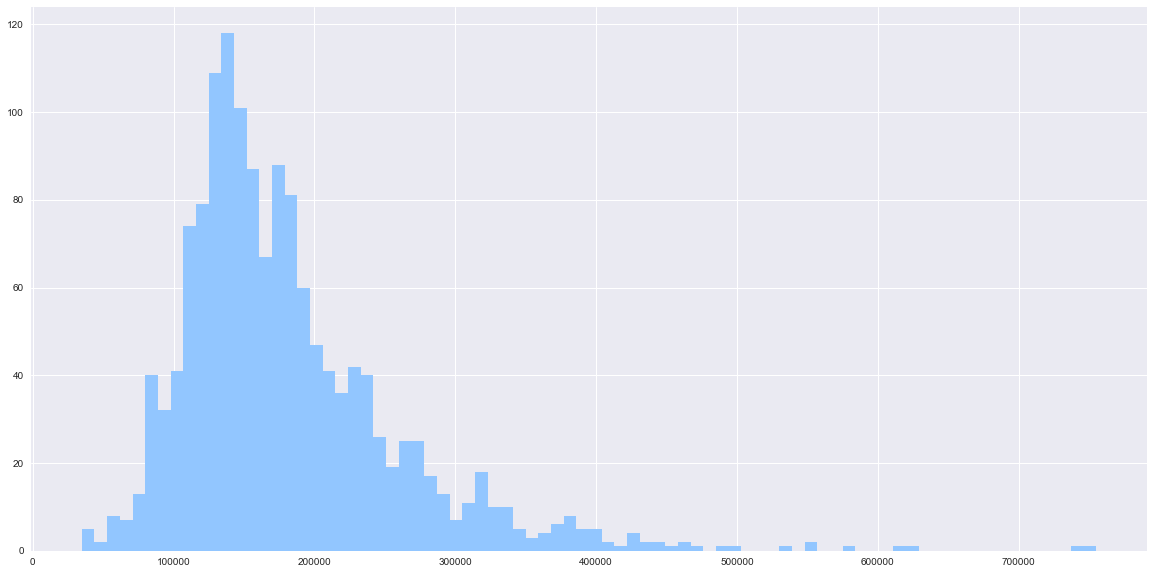

In [119]:
df_tmp.SalePrice.hist(bins=80, figsize = (20,10));

### We are noticing that our saleprice data is skewed, so we will log transform our data to get a normal distribution. The plot will show the difference before and after.

In [120]:
df_tmp["SalePrice"] = np.log(df_tmp["SalePrice"])

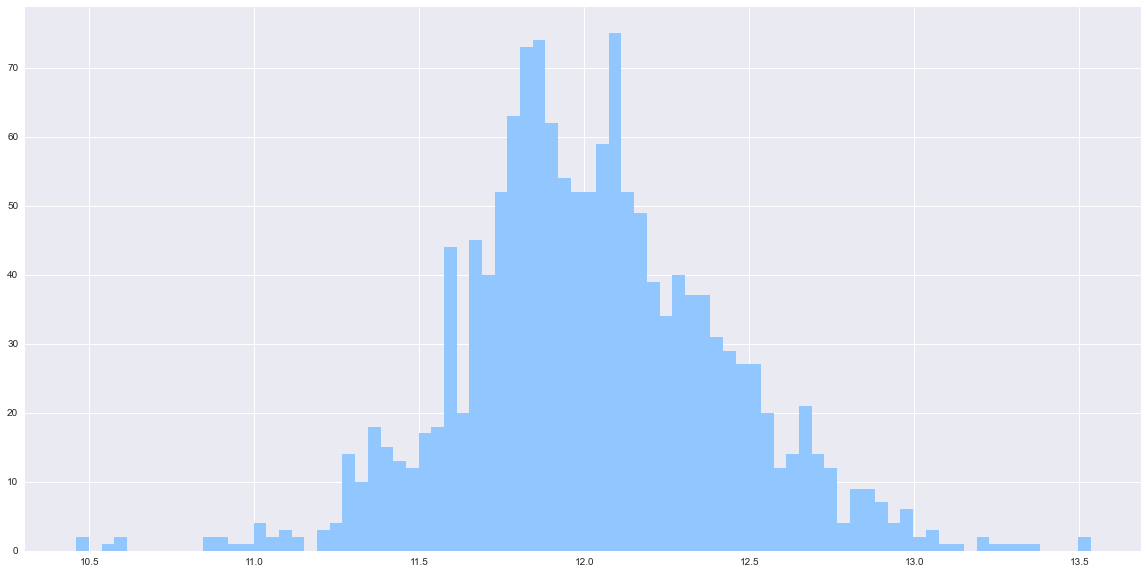

In [121]:
df_tmp.SalePrice.hist(bins=80, figsize = (20,10));

In [123]:
df_tmp.SalePrice[:10]

1349    11.711776
1137    11.451050
747     12.491173
304     12.594731
1132    11.674194
630     11.728037
991     12.031719
106     11.512925
1416    11.715866
945     11.735269
Name: SalePrice, dtype: float64

### Now we will again fit our data to valid for the final time( as we hope).

In [124]:
# Splitting data
df_val = df_tmp[df_tmp.YearBuilt <2005]
df_train = df_tmp[df_tmp.YearBuilt >= 2005]

len(df_val), len(df_train)

(1238, 222)

In [125]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((222, 52), (222,), (1238, 52), (1238,))

In [126]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_valid,y_valid),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_valid)
show_scores(cat_model_f)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'Training MAE': 0.03161184692259365,
 'Valid MAE': 0.17524251636979532,
 'Training RMSLE': 0.0030818013785717667,
 'Valid RMSLE': 0.019575367699955465,
 'Training R^2': 0.9842181867023898,
 'Valid R^2': 0.5488965472895581,
 'Valid RMSE': 0.021246152828953657}

### We got a lot better result this time. Alhamdulillah... Now we can check on our test data and predict the 1st submission worthy SalePrice.

#### Our test data is not ready to be predicted as it has Null values and NonNumerical values as preprocessed train data.

In [139]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LotFrontage               1459 non-null   float64
 1   OverallQual               1459 non-null   int64  
 2   YearBuilt                 1459 non-null   int64  
 3   YearRemodAdd              1459 non-null   int64  
 4   MasVnrArea                1459 non-null   float64
 5   ExterQual                 1459 non-null   int8   
 6   Foundation                1459 non-null   int8   
 7   BsmtQual                  1459 non-null   int8   
 8   BsmtFinSF1                1459 non-null   float64
 9   TotalBsmtSF               1459 non-null   float64
 10  HeatingQC                 1459 non-null   int8   
 11  1stFlrSF                  1459 non-null   int64  
 12  2ndFlrSF                  1459 non-null   int64  
 13  GrLivArea                 1459 non-null   int64  
 14  FullBath

In [128]:
# Process our test data
# Turn all of the string value into category value
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [129]:
# Fill Numeric null value with MEDIAN
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_test[label+"_is_Missing"] = pd.isnull(content)
            # Fill missing numeric value with median
            df_test[label] = content.fillna(content.median())

In [131]:
# Turn categories into numerical
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column which tells us if the data was missing
        df_test[label+"_is_Missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_test[label] = pd.Categorical(content).codes+1

In [133]:
df_test = df_test.drop(df_test.columns[dropped_index], axis = 1)

In [135]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LotFrontage               1460 non-null   float64
 1   OverallQual               1460 non-null   int64  
 2   YearBuilt                 1460 non-null   int64  
 3   YearRemodAdd              1460 non-null   int64  
 4   MasVnrArea                1460 non-null   float64
 5   ExterQual                 1460 non-null   int8   
 6   Foundation                1460 non-null   int8   
 7   BsmtQual                  1460 non-null   int8   
 8   BsmtFinSF1                1460 non-null   int64  
 9   TotalBsmtSF               1460 non-null   int64  
 10  HeatingQC                 1460 non-null   int8   
 11  1stFlrSF                  1460 non-null   int64  
 12  2ndFlrSF                  1460 non-null   int64  
 13  GrLivArea                 1460 non-null   int64  
 14  FullBa

### We see some columns are extra in the test set and some columns are missing on the test set. So we will manually  adjust the columns to fit while predicting.

In [144]:
set(df_tmp.columns) - set(df_test_dropped.columns)

{'CentralAir_is_Missing',
 'Condition2_is_Missing',
 'ExterQual_is_Missing',
 'Exterior1st_is_Missing',
 'Exterior2nd_is_Missing',
 'FireplaceQu_is_Missing',
 'Functional_is_Missing',
 'HeatingQC_is_Missing',
 'Heating_is_Missing',
 'RoofMatl_is_Missing',
 'SalePrice'}

In [141]:
df_test_dropped = df_test.drop(['Alley_is_Missing',
 'BsmtExposure_is_Missing',
 'BsmtFinType1_is_Missing',
 'BsmtFinType2_is_Missing',
 'BsmtHalfBath_is_Missing',
 'BsmtQual_is_Missing',
 'BsmtUnfSF_is_Missing',
 'Fence_is_Missing',
 'GarageArea_is_Missing',
 'GarageCars_is_Missing',
 'GarageCond_is_Missing',
 'GarageFinish_is_Missing',
 'GarageQual_is_Missing',
 'GarageYrBlt_is_Missing',
 'LotFrontage_is_Missing',
 'MiscFeature_is_Missing',
 'PoolQC_is_Missing',
 'TotalBsmtSF_is_Missing'], axis=1)

In [145]:
# adding missing columns
new_columns = ['CentralAir_is_Missing',
 'Condition2_is_Missing',
 'ExterQual_is_Missing',
 'Exterior1st_is_Missing',
 'Exterior2nd_is_Missing',
 'FireplaceQu_is_Missing',
 'Functional_is_Missing',
 'HeatingQC_is_Missing',
 'Heating_is_Missing',
 'RoofMatl_is_Missing']
df_test_dropped[new_columns] = False
df_test_dropped

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,...,CentralAir_is_Missing,Condition2_is_Missing,ExterQual_is_Missing,Exterior1st_is_Missing,Exterior2nd_is_Missing,FireplaceQu_is_Missing,Functional_is_Missing,HeatingQC_is_Missing,Heating_is_Missing,RoofMatl_is_Missing
0,80.0,5,1961,1961,0.0,4,2,4,468.0,882.0,...,False,False,False,False,False,False,False,False,False,False
1,81.0,6,1958,1958,108.0,4,2,4,923.0,1329.0,...,False,False,False,False,False,False,False,False,False,False
2,74.0,5,1997,1998,0.0,4,3,3,791.0,928.0,...,False,False,False,False,False,False,False,False,False,False
3,78.0,6,1998,1998,20.0,4,3,4,602.0,926.0,...,False,False,False,False,False,False,False,False,False,False
4,43.0,8,1992,1992,0.0,3,3,3,263.0,1280.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,4,1970,1970,0.0,4,2,4,0.0,546.0,...,False,False,False,False,False,False,False,False,False,False
1455,21.0,4,1970,1970,0.0,4,2,4,252.0,546.0,...,False,False,False,False,False,False,False,False,False,False
1456,160.0,5,1960,1996,0.0,4,2,4,1224.0,1224.0,...,False,False,False,False,False,False,False,False,False,False
1457,62.0,5,1992,1992,0.0,4,3,3,337.0,912.0,...,False,False,False,False,False,False,False,False,False,False


In [146]:
df_tmp.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,...,Foundation_is_Missing,Heating_is_Missing,HeatingQC_is_Missing,CentralAir_is_Missing,KitchenQual_is_Missing,Functional_is_Missing,FireplaceQu_is_Missing,PavedDrive_is_Missing,SaleType_is_Missing,SaleCondition_is_Missing
1349,50.0,8,1872,1987,0.0,4,1,4,259,684,...,False,False,False,False,False,False,True,False,False,False
1137,54.0,5,1875,1996,0.0,4,2,4,0,780,...,False,False,False,False,False,False,True,False,False,False
747,65.0,7,1880,2003,0.0,3,5,4,0,1240,...,False,False,False,False,False,False,False,False,False,False
304,87.0,7,1880,2002,0.0,4,1,4,0,1470,...,False,False,False,False,False,False,False,False,False,False
1132,90.0,6,1880,1950,0.0,4,1,4,0,1008,...,False,False,False,False,False,False,True,False,False,False


## Now we are pretty much ready to predict on test set.

In [147]:
catf_pred_f = cat_model_f.predict(df_test_dropped)

In [150]:
## Creating submission data
df_test_main = pd.read_csv("data/test.csv")
test_id = df_test_main['Id']
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(catf_pred_f)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,149877.589895
1,1462,170865.367184
2,1463,200214.799109
3,1464,200687.890507
4,1465,195921.343316


In [151]:
# Saving the results in a csv file

#submission.to_csv("result.csv", index = False, header = True)

In [152]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [153]:
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_valid,y_valid),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_valid)
show_scores(cat_model_f)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'Training MAE': 0.03161184692259365,
 'Valid MAE': 0.17524251636979532,
 'Training RMSLE': 0.0030818013785717667,
 'Valid RMSLE': 0.019575367699955465,
 'Training R^2': 0.9842181867023898,
 'Valid R^2': 0.5488965472895581,
 'Valid RMSE': 0.021246152828953657}

In [159]:
show_scores(cat_model_f)

{'Training MAE': 0.03161184692259365,
 'Valid MAE': 0.17524251636979532,
 'Training RMSLE': 0.0030818013785717667,
 'Valid RMSLE': 0.019575367699955465,
 'Training R^2': 0.9842181867023898,
 'Valid R^2': 0.5488965472895581,
 'Valid RMSE': 0.24936185516379739}

In [180]:
for i in range(0,127):
    if abs(corr_mat[i]) > 0.6:
        dropped_index.append(i)
        print(corr_mat.index[i])

OverallQual
ExterQual
TotalBsmtSF
1stFlrSF
GrLivArea
GarageCars
GarageArea
SalePrice


### `TotalBsmtSF` , `1stFlrSF`, `GrLivArea`, `GarageArea` has outliers, need to crop some rows out

In [213]:
df_tmp["GarageArea"].value_counts()

0       81
440     49
576     47
240     38
484     34
        ..
671      1
342      1
673      1
675      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

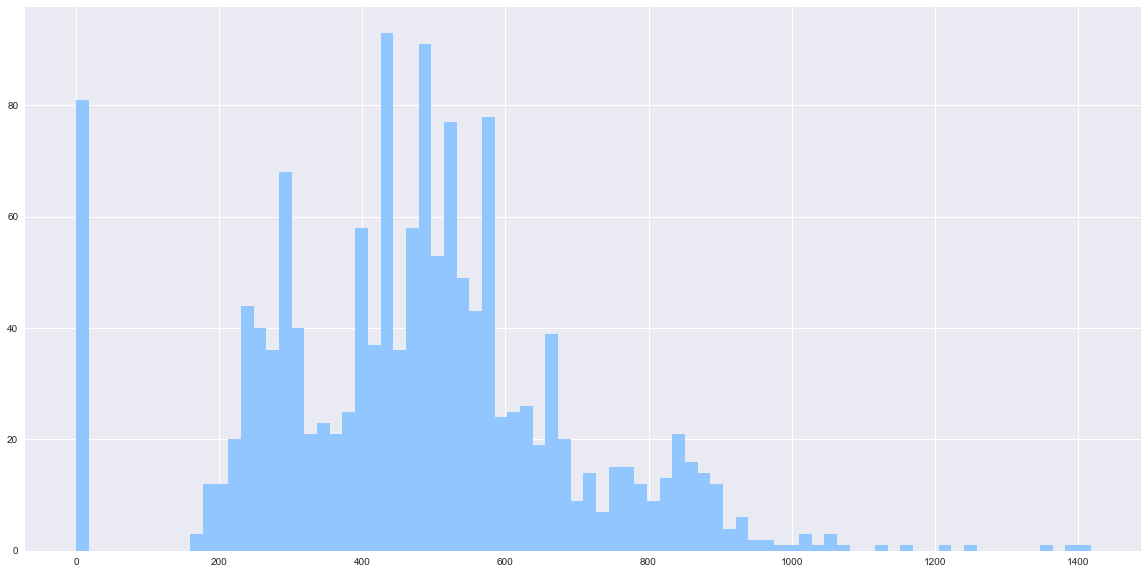

In [214]:
df_tmp["GarageArea"].hist(bins=80, figsize = (20,10));